In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Param Estimation

* We randomly count the number of observed moving traffic citations within a 5 mile radius of UH Manoa during 90-days, spread across 12 months
  * We want to even out sampling to avoid any bias
   * Ex. We may underestimate # citations during summer or overestimate # citations during the holiday season

* What does it mean to estimate the distribution parameter based on maximum likelihood?

In [7]:
citations_data = pd.read_csv("https://www.dropbox.com/s/eg7wyjur1ff6d63/citations_counts.tsv?dl=1", index_col="Day")
citations_data.head()

,Counts
Day,
0,27
1,18
2,30
3,13
4,20


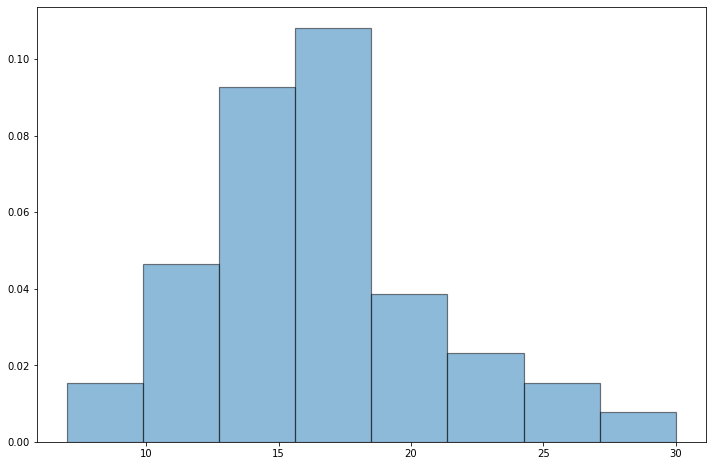

In [8]:
plt.figure(figsize=(12,8))

plt.hist(citations_data["Counts"], bins=8, density=True, edgecolor='black', linewidth=1.2, alpha=0.5)
x = np.arange(30)




### Fitting the Data

* Since this is count data, we'll try to fit it using a Poisson distribution

* Form the data, we see that the most frequent value for the number of citations is $\approx$ 17
  * Poisson distribtion  with a mean ($\lambda$) of 8  is not likely to have generate this dataset
  * Poisson distribtion  with a mean ($\lambda$) of 18  is more likely to have generate this dataset that a value of $\lambda =8$
  
  
  
<img src="https://www.dropbox.com/s/33vk1qjfw2s5bp1/counts_lambdas.png?dl=1" alt="drawing" width="300px"/>
  

### Question 

* Why do the two distributions have different heights?

<img src="https://www.dropbox.com/s/33vk1qjfw2s5bp1/counts_lambdas.png?dl=1" alt="drawing" width="300px"/>

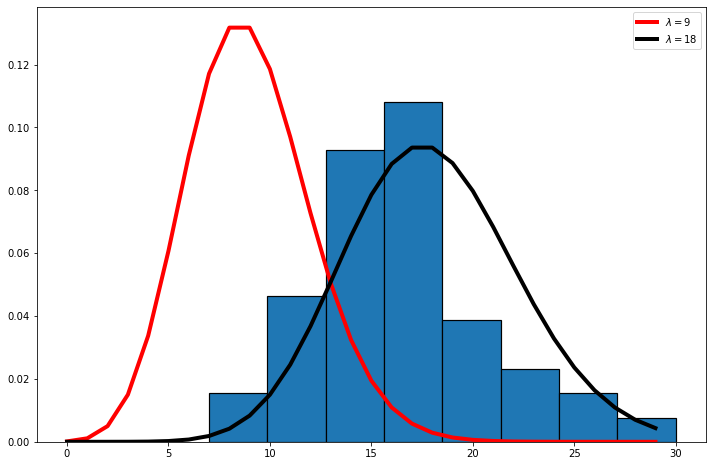

In [14]:
plt.figure(figsize=(12,8))

from scipy.stats import poisson


np.random.seed(4)

plt.hist(citations_data["Counts"], bins=8, density=True, edgecolor='black', linewidth=1.2)
x = np.arange(30)

p_y = poisson.pmf(x, 9)
plt.plot(x, p_y, color= 'r', linewidth=4, label="$\lambda=9$")
p_y = poisson.pmf(x, 18)
plt.plot(x, p_y, color= 'k', linewidth=4, label="$\lambda=18$")
plt.legend()

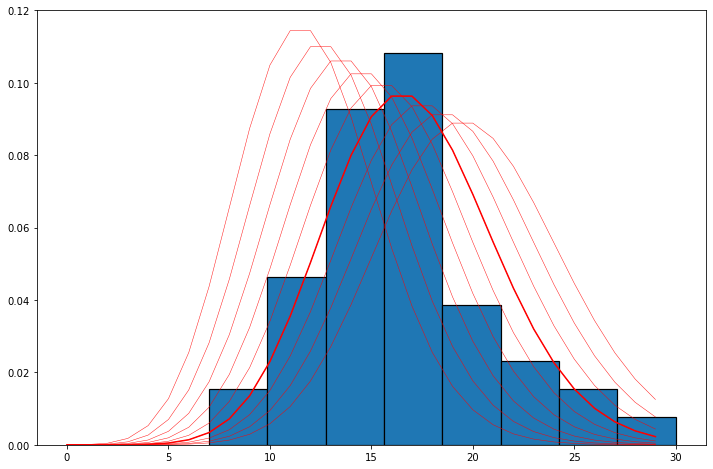

In [15]:
plt.figure(figsize=(12,8))

plt.hist(citations_data["Counts"], bins=8, density=True, edgecolor='black', linewidth=1.2)

for i in [12,13,14,15,16, 17,18,19,20]:
    p_y = poisson.pmf(x, i)
    plt.plot(x, p_y, color= 'r', linewidth=0.5, label="$\lambda=%sa$" % i, alpha=.9)

p_y = poisson.pmf(x, 17)
plt.plot(x, p_y, color= 'r', linewidth=1.5, label="$\lambda=%sa$" % i)
    

### Question 

* The graph below shows clearly that some plots better fit the data.
* How could we formally (or informally) decide which one is the best fit for the data?


### Computing the Probability of Observing these Data 

* We know how to compute the probability of each point given a function. 
  * We know how to compute the probability (pmf) of a single event
          `poisson.pmf(x, lambda)`
  * Since all events are independent, the probability of the complete dataset is simply the product of all probabilities
              `np.product(poisson.pmf(x, lambda))`
* We can compute the probability given each possible parameter $\lambda$
  * We limit ourselves to reasonable values


### Example: Compound probability of Independent Events

* Given a fair coin $p(H)=p(T) = 1/2$
* If we flip the coin twice, the sample sapce is \{HH, HT, TH, TT\} and  probabilities of the different outcomes is:

$$
p(HH) = p(H) * p(H) = 1/4 \\
p(HT) = p(H) * p(T) = 1/4 \\
p(TH) = p(T) * p(H) = 1/4 \\
p(TT) = p(T) * p(T) = 1/4 \\
$$

* As expected, all the probabilities sum to one 

* This only works if the probabilities are independent; i.e., obtaining `head` in the first toss does not affect the outcome of the second coin flip

### Computing the Likelihood (Probability)

* If the events are independent, the probability of the data is is the product of the probabilities

* This is calld the the likelihood $L$ of the data given the parameter $\lambda$

$$ 
\begin{align}
L([x_1,x_2,...x_{90}] | \lambda) &= pmf(x_1, \lambda) \times  pmf(x_2, \lambda)  ....  pmf(x_{90}, \lambda) \\
  &=  \prod_{i=1}^{90} pmf(x_i, \lambda) 
\end{align}
$$



In [16]:
data_point = 12
_lambda = 16
poisson.pmf(data_point, _lambda)

0.06612887239464967

In [17]:
data_point = 16
_lambda = 16
poisson.pmf(data_point, _lambda)

0.09921753162215541

In [18]:

poisson.pmf(citations_data["Counts"], _lambda)


array([0.00335386, 0.08300552, 0.00056393, 0.08138938, 0.05591951,
       0.04959665, 0.09921753, 0.06612887, 0.09338121, 0.06989938,
       0.09921753, 0.04959665, 0.09921753, 0.09921753, 0.09921753,
       0.06989938, 0.09301644, 0.08300552, 0.09338121, 0.0309857 ,
       0.08300552, 0.09921753, 0.02155527, 0.05591951, 0.0309857 ,
       0.09301644, 0.09338121, 0.09338121, 0.09921753, 0.01198747,
       0.04959665, 0.09301644, 0.00599374, 0.08300552, 0.09338121,
       0.09921753, 0.09921753, 0.08300552, 0.09301644, 0.09301644,
       0.09921753, 0.09338121, 0.08138938, 0.09921753, 0.08300552,
       0.09301644, 0.09338121, 0.06989938, 0.09921753, 0.06612887,
       0.09921753, 0.00105737, 0.09921753, 0.09921753, 0.08300552,
       0.09921753, 0.09301644, 0.06989938, 0.06612887, 0.02131106,
       0.05591951, 0.09301644, 0.09301644, 0.09301644, 0.02131106,
       0.09338121, 0.0309857 , 0.00919692, 0.06612887, 0.08138938,
       0.0340977 , 0.01437018, 0.09338121, 0.05591951, 0.03098

In [19]:
np.product(poisson.pmf(citations_data["Counts"], _lambda))


1.1152800100792753e-113

### Question

* How can the likelihood of citation data be so low?

```python
>>> np.product(poisson.pmf(citations_data["Counts"], _lambda))

1.1152800100792753e-113
```



### Understanding the Likelihood (Probability)

* Why is the resulting probability so small?
  * Thik, for instance about a sample form 3 days where the citations were (16,15,21)
  * The sample space is large and includes (0,1,8), (1,10,10), (21,11,28), ...
  * If the maximimum number of citations daily is 50, then the sample space has a size 132,651.
     * The probability of observing (12,11,11) is just one event (possibility)  among  many (countably infinite) other events.

* The sample space for 90 days is $5.15377520732010019344215834280 \times 10^{29}$
    * It therefore makes sense that the computed likelihoos is so small

In [20]:
_lambda = 16
np.product(poisson.pmf((16,15,16), _lambda))

0.0009767091466218046

In [21]:
np.product(poisson.pmf((9,11,11), 16))

5.24215504845479e-05

In [22]:
total_prob = 0
for i in range(0, 35):
    for j in range(0, 35):
        for k in range(0, 35):
            total_prob += np.product(poisson.pmf((i,j,k), 16))
            
print(total_prob)

0.9999192928464893


In [23]:
for i in range(12, 21):
    likelihood_data_i = np.product(poisson.pmf(citations_data["Counts"], i))
    print("The likelihood of the data given lambda=%s is %s" % (i, likelihood_data_i))

The likelihood of the data given lambda=12 is 7.225758340021846e-142
The likelihood of the data given lambda=13 is 1.3062039910366992e-129
The likelihood of the data given lambda=14 is 3.6837061119261494e-121
The likelihood of the data given lambda=15 is 5.438292115885739e-116
The likelihood of the data given lambda=16 is 1.1152800100792753e-113
The likelihood of the data given lambda=17 is 7.058672617915774e-114
The likelihood of the data given lambda=18 is 2.670870493915664e-116
The likelihood of the data given lambda=19 is 1.051303302700141e-120
The likelihood of the data given lambda=20 is 6.877960001068855e-127


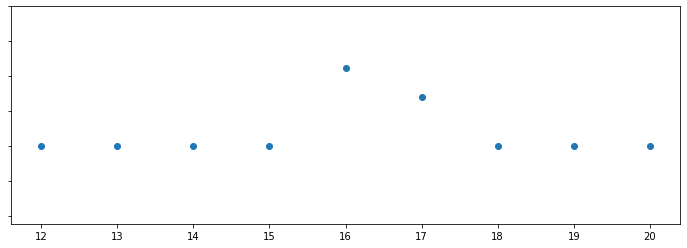

In [34]:
plt.figure(figsize=(12,4))

x = range(12, 21)
l_x = [np.product(poisson.pmf(citations_data["Counts"], i)) for i in x]


frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.scatter(x, l_x)

_= plt.ylim(-1.1152800100792753e-113, 0.2e-112)


### Understanding the Likelihood - Cont'd

* Working with small numbers can lead to likelihood to be very small
  * Can lead to arithmetic floating point underflow 
    * Results of a calculation smaller than what can actually be represented in memory
* Rather than computing likelihood, we can calculate Log-likelihood
  * Scale changes but share of the function does not


### Understanding the Likelihood - Cont'd

We know that:

$$
log(x \cdot y) = log(x) + log(y)
$$

Therefore:

\begin{align}
\mbox{log}(L([x_1,x_2,..., x_{90}] | \lambda)) &= \mbox{log}(\mbox{pmf}(x_1, \lambda)) \times  \mbox{log}(\mbox{pmf}(x_2, \lambda))  ....  \mbox{log}(\mbox{pmf}(x_{90}, \lambda)) \\
  &=  \sum_{i=1}^{90} \mbox{log}(\mbox{pmf}(x_i, \lambda)) 
\end{align}

* The resulting values are no longer probabilities as they don't sum to 1


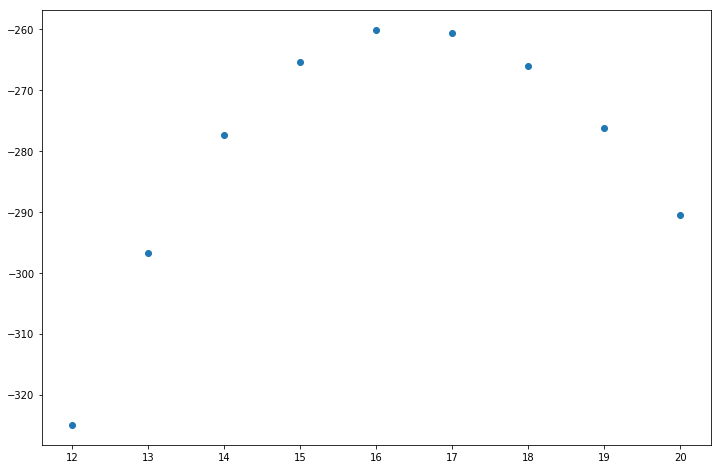

In [49]:
plt.figure(figsize=(12,8))

x = range(12, 21)
l_x = [np.sum(np.log(poisson.pmf(citations_data["Counts"], i))) for i in x]

plt.scatter(x, l_x)


### Maximum likelihood For the Poisson Distribution

* We hypothesize that the data was generated using a parameter $\lambda$ 
  * Among all possible lambda values, the data is most likely under one of those
  * We say that this  value maximizes the likelihood

* We can quickly show that the value that maximized the likelihood merely is the sample mean!

```python 
>>> np.mean(citations_data["Counts"]) 
16.41
```
* While we assumed that the data is best represented using a Poisson, we could have manually tested other distributions and selected the one that provides the highest likelihood
  * Therefore, this approach is not only suitable for estimating a parameter, but also making decisions

# Example: A/B Testing


* In an A/B test, we are interested in comparing two versions of a webpage
  * We would like to determine which one performs better at a task `X`
    
* Ex.: Is Version A (new) or Version B (old) better at signing up new users?


<img src="https://www.dropbox.com/s/q6lmnox6asz339r/ab.jpg?dl=1" alt="drawing" style="width:400px;"/>


### Maximum Likelihood For a Binomial Distribution

* For now, we are only concerned with version A.

* We test 8 individuals (unrealistically small sample) using version A
 * 5 sign up for the newsletter

*  What can we infer about the type of data and parameter that gave rise to this outcome


### Maximum Likelihood For a Binomial Distribution

  
1. The data is distributed according to a binomial distribution 
   * $n=8$ and $p \in [0,1]$

2 Intuitively, we know that parameter cannot too small or too big
  * From the data, p is somewhere in the upper  side of the range
  * Ex the data is more likely with a $p=0.8$ than with  $p=0.03$

* We can determine $p$ using the same approach used with traffic citations data

In [50]:
from scipy.stats import binom
n = 8 
p = 0.5
binom.pmf(3,n ,p)

0.21875000000000014

In [51]:
binom.pmf(4, n ,p)

0.27343750000000017

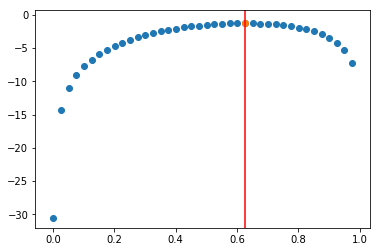

In [52]:
x = np.arange(0.001,1,0.025)
l_x_vals = []
for p in x:
    l_x_i = np.sum(np.log(binom.pmf(5, n , p)))
    l_x_vals.append(l_x_i)
    
plt.scatter(x, l_x_vals)
plt.scatter(x[np.argmax(l_x_vals)], np.max(l_x_vals))

plt.axvline(0.625, color='r')


### Maximum Likelihood For a Binomial Distribution - Cont'd



* If we toss a coin 100 times and observe 85 heads, then we assume the probability of heads is 0.85 
* Since 5 out of 8 clients signed up, we assume that $p = 5/ 8 =  0.625$
  * Therefor the maximum likelihood ($p=0.625$) result is consistent with our intuition $p = 5/ 8 =  0.625$

###  Maximum Likelihood Estimation

* The maximum likelihood estimators for parameters of common distributions can be computed analytically
  * Ex. The maximum estimator of the mean in a gaussian is simply the sample mean and the estimator of the standard deviation is the sample's standard deviation
     
$$
\hat{\mu} = \frac{1}{n} \sum_{i=1}^{n}x_i, 
$$
and
$$
\hat{\mu} = \frac{1}{n} \sum_{i=1}^{n}{(x_i - \bar{x})^2}.
$$
       
* Recall that ML estimators are simply point-estimates that maximize the likelihood of data
* Do not give us a probability of the value we generate
 * We do not have the probability or confidence that it is the correct parameter of the population
 * they don't even provide confidence interfals, as the bootstrap approach did.
 
* The questions is then: ** "How different could this estimate have been, if the sample had come out differently?"**
